In [1]:
#Let's use Trees to explore some real-world data sets

In [2]:
#We import a data set of figures
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
digits = load_digits()
digits.images.shape

(1797, 8, 8)

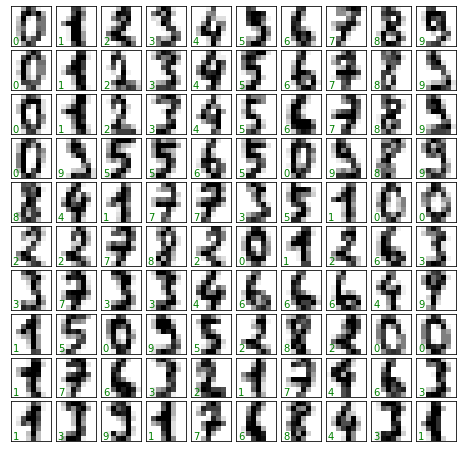

In [3]:
#Let's visualize some of these...
fig, axes = plt.subplots(10,10,figsize=(8,8),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw = dict(hspace=0.1,wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(digits.target[i]), transform = ax.transAxes, color='green')

In [25]:
#The data is stored flattened, so each 8x8 figure is a vector of length 64
X = digits.data
X.shape

(1797, 64)

In [26]:
y = digits.target
y.shape

(1797,)

In [27]:
#Let's try hit this with a Random Forest classifier. First, the train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
Xtrain,Xtest,ytrain,ytest = train_test_split(digits.data,digits.target,random_state =0)
#Now we fit the model and get the prediction
model = RandomForestClassifier(n_estimators=100)
model.fit(Xtrain,ytrain)
ypred=model.predict(Xtest)


In [28]:
#sklearn gives us all the prediction statistics...
from sklearn import metrics
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.96      1.00      0.98        43
           2       1.00      0.95      0.98        44
           3       0.98      0.98      0.98        45
           4       1.00      0.97      0.99        38
           5       0.94      0.98      0.96        48
           6       1.00      1.00      1.00        52
           7       0.98      1.00      0.99        48
           8       0.98      0.94      0.96        48
           9       0.98      0.96      0.97        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



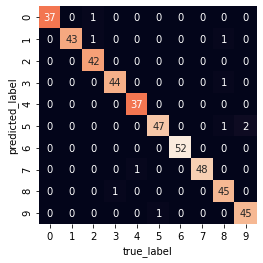

In [29]:
#We can also visualize a confusion matrix to compare predicted vs true labels
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest,ypred)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)
plt.xlabel('true_label')
plt.ylabel('predicted_label');

In [30]:
#It seems like Random Forests have this in the bag! But let's make this harder...

In [31]:
#We'll corrupt our test images by adding random Gaussian noise, scaled by m 
#Let's set m=5...this will produced some VERY noisy images
def corrupt(img,m):
    return img + np.random.normal(size = np.shape(img))*m
corrupt_test = [corrupt(f,5) for f in Xtest]

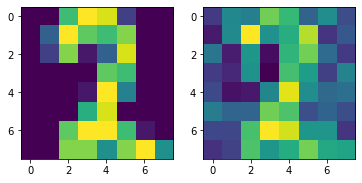

In [32]:
#Visualizing one of the images:
fig, axes = plt.subplots(1,2)
axes[0].imshow(np.reshape(Xtest[0],(8,8)))
axes[1].imshow(np.reshape(corrupt_test[0],(8,8)))

In [33]:
#Prediction accuracy seems to have fallen!
model = RandomForestClassifier(n_estimators=100)
model.fit(Xtrain,ytrain)
ypred=model.predict(corrupt_test)
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        37
           1       0.91      0.72      0.81        43
           2       0.88      0.82      0.85        44
           3       0.77      0.73      0.75        45
           4       0.85      0.89      0.87        38
           5       0.88      0.77      0.82        48
           6       0.91      0.94      0.92        52
           7       0.78      0.83      0.81        48
           8       0.58      0.69      0.63        48
           9       0.74      0.79      0.76        47

    accuracy                           0.81       450
   macro avg       0.82      0.81      0.81       450
weighted avg       0.81      0.81      0.81       450



In [34]:
#Challenge 1: Can you make adjustments to our random forest classifier to improve the accuracy on the
# corrupted data set?
#Challenge 2: Now try Gradient Boosting, for both the original and corrupted target data. You will again have to
# make some adjustments to get good results on the corrupt data.
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [35]:
#Challenge 1: It does consistently a little bit better with more estimators.
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain,ytrain)
ypred=model.predict(corrupt_test)
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        37
           1       0.97      0.74      0.84        43
           2       0.88      0.84      0.86        44
           3       0.85      0.73      0.79        45
           4       0.84      0.97      0.90        38
           5       0.85      0.85      0.85        48
           6       0.94      0.98      0.96        52
           7       0.78      0.81      0.80        48
           8       0.69      0.79      0.74        48
           9       0.81      0.81      0.81        47

    accuracy                           0.85       450
   macro avg       0.85      0.85      0.85       450
weighted avg       0.85      0.85      0.85       450



In [36]:
#Challenge 2: Uncorrupted data
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100)
model.fit(Xtrain,ytrain)
ypred=model.predict(Xtest)
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        37
           1       0.98      0.95      0.96        43
           2       0.98      0.93      0.95        44
           3       0.95      0.93      0.94        45
           4       0.97      0.95      0.96        38
           5       0.96      0.96      0.96        48
           6       1.00      0.94      0.97        52
           7       0.96      0.98      0.97        48
           8       0.90      0.98      0.94        48
           9       0.90      0.94      0.92        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [37]:
#Challenge 2: It does poorly on corrupted data!
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100)
model.fit(Xtrain,ytrain)
ypred=model.predict(corrupt_test)
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      0.54      0.65        37
           1       0.82      0.53      0.65        43
           2       0.34      0.86      0.49        44
           3       0.74      0.62      0.67        45
           4       0.49      0.76      0.60        38
           5       0.73      0.73      0.73        48
           6       0.87      0.38      0.53        52
           7       0.79      0.65      0.71        48
           8       0.55      0.50      0.52        48
           9       0.89      0.66      0.76        47

    accuracy                           0.62       450
   macro avg       0.70      0.62      0.63       450
weighted avg       0.71      0.62      0.63       450



In [38]:
#Challenge 2: Adding a max_features=sqrt subset selection makes the model more robust.
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
model.fit(Xtrain,ytrain)
ypred=model.predict(corrupt_test)
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.62      0.75        37
           1       0.87      0.63      0.73        43
           2       0.61      0.93      0.74        44
           3       0.70      0.71      0.70        45
           4       0.60      0.87      0.71        38
           5       0.78      0.88      0.82        48
           6       0.97      0.62      0.75        52
           7       0.76      0.73      0.74        48
           8       0.59      0.62      0.61        48
           9       0.86      0.79      0.82        47

    accuracy                           0.74       450
   macro avg       0.77      0.74      0.74       450
weighted avg       0.77      0.74      0.74       450



In [39]:
#Let's turn to another data set: the iris data set
#read more about this dataset here: https://archive.ics.uci.edu/ml/datasets/iris
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [40]:
#We load the data, split it, and train the model
iris = load_iris()
X = iris.data
y = iris.target
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state =0)
tree_clf = DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(Xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(125.55000000000001, 190.26, 'X[3] <= 0.8\nentropy = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(83.7, 135.9, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(167.4, 135.9, 'X[2] <= 4.95\nentropy = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(83.7, 81.53999999999999, 'X[3] <= 1.65\nentropy = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(41.85, 27.180000000000007, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(251.10000000000002, 81.53999999999999, 'X[3] <= 1.75\nentropy = 0.05\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(209.25, 27.180000000000007, 'entropy = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(292.95, 27.180000000000007, 'entropy = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

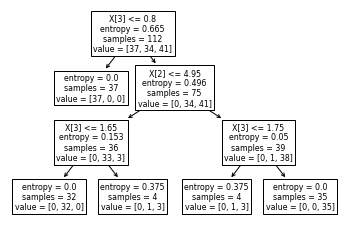

In [41]:
#sklearn lets us visualize the tree nicely...
from sklearn import tree
tree.plot_tree(tree_clf)

In [42]:
#We predic the target labels and check our results
ypred=tree_clf.predict(Xtest)
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [43]:
#We can also look at the feature importances...
tree_clf.feature_importances_

array([0.        , 0.        , 0.41604061, 0.58395939])

In [44]:
#Challenge 3: To get a sense of the instability of our tree to random_state in the train-test split,
#visualize the variation in the feature importances across a host of random splits. What happens if the trees
#are allowed to be deeper than max_depth = 2?
#Challenge 4: Conduct the same experiment, replacing decision trees with random forests. What do you observe
#about the variation of the feature importances?